In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

## Load Data

In [2]:
# import data
crypto = pd.read_csv('file/crypto.csv')
stock = pd.read_csv('file/stockmarket.csv')

In [3]:
# Check columns we want to explore
stock.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_metadata', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit

In [4]:
# Create the dataframe we want to do EDA
df_stock = stock[['title','id','author','subreddit','score']]
df_crypto = crypto[['title','id','author','subreddit','score']]

In [5]:
# Null value for selftext 
stock.isnull().sum()['selftext']

427

In [56]:
# Null value for title
crypto.isnull().sum()['selftext']

441

## EDA

### Check title length

In [7]:
def get_word_count(status):
    return len(status.split())

In [8]:
# new columns contain title length, word counts
df_stock['title_len'] = df_stock['title'].map(len)
df_stock['title_words'] = df_stock['title'].map(get_word_count)
df_crypto['title_len'] = df_crypto['title'].map(len)
df_crypto['title_words'] = df_crypto['title'].map(get_word_count)

<ipython-input-8-8111fc3f2ac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['title_len'] = df_stock['title'].map(len)
<ipython-input-8-8111fc3f2ac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['title_words'] = df_stock['title'].map(get_word_count)
<ipython-input-8-8111fc3f2ac8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [13]:
df_crypto.sort_values(by='title_words',ascending=False).head()

,title,id,author,subreddit,score,title_len,title_words
716,Where does the value in Moons come from? Is th...,o12byo,Reckadesacration,CryptoCurrency,19,298,64
792,"Question, I just found out there is a gift tax...",o11i2u,Palito415,CryptoCurrency,1,292,63
787,"Question, I just found out there is a gift tax...",o11iyo,Palito415,CryptoCurrency,4,292,63
505,My cat Winky was mauled by a Fox last night I ...,o1614v,Otherwise-League7842,CryptoCurrency,1,304,62
234,Was interested in how long everyone stays in t...,o1afez,bob_dobbs507,CryptoCurrency,1,296,55


In [12]:
df_stock.sort_values(by='title_words',ascending=False).head()

,title,id,author,subreddit,score,title_len,title_words
980,$CLF What I see is most likely we will test zo...,nwr8ok,Mtraders,StockMarket,4,298,65
593,SNDL is at 1$ and I think it will go up to 3 d...,nyrwhz,AdministrativeYard,StockMarket,1,288,59
920,$wish Has held the line thus far! Currently I ...,nwyclu,Mtraders,StockMarket,0,289,59
757,Question: Who does these MONSTER trades at 4:0...,nxpiu3,ejpusa,StockMarket,1,290,56
292,"Goodmorning ladies and Gents, i Know that most...",o09tbl,TransportationFair88,StockMarket,0,274,55


### Visualize title length

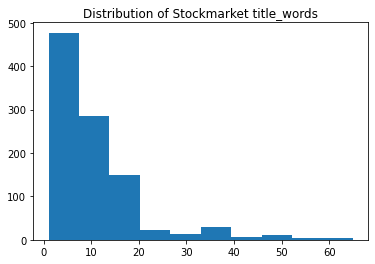

In [16]:
plt.title('Distribution of Stockmarket title_words')
plt.hist(df_stock['title_words']);

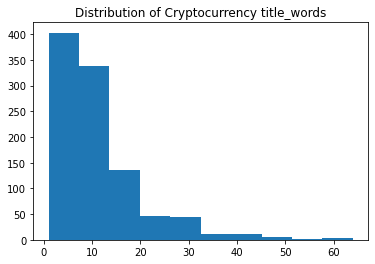

In [17]:
plt.title('Distribution of Cryptocurrency title_words')
plt.hist(df_crypto['title_words']);

### Visualize score

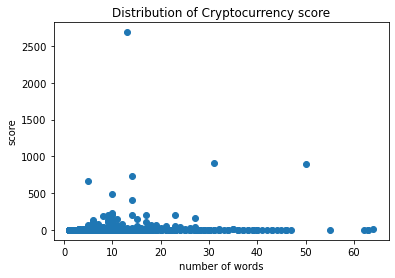

In [33]:
plt.title('Distribution of Cryptocurrency score')
plt.scatter(df_crypto['title_words'],df_crypto['score'])
plt.xlabel('number of words')
plt.ylabel('score')
plt.savefig('picture/Cryptocurrency_score.png');

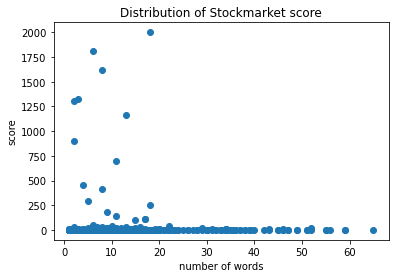

In [34]:
plt.title('Distribution of Stockmarket score')
plt.scatter(df_stock['title_words'],df_stock['score'])
plt.xlabel('number of words')
plt.ylabel('score')
plt.savefig('picture/Stockmarket_score.png');

### Authors' post habit

In [27]:
df_stock['author'].value_counts()

[deleted]               56
Mtraders                26
AccomplishedRush4641    18
Grade19282              12
SavannahSmiles_         11
                        ..
Pitiful_Slip             1
kpruhs                   1
Psychological_Owl281     1
offshorecanyons          1
Effective-Cricket-       1
Name: author, Length: 650, dtype: int64

In [37]:
df_stock[df_stock['author'] == 'Mtraders'].to_csv("EDA/Mtrader's posts.csv")

In [41]:
df_stock[df_stock['author'] == 'Mtraders'].head(10)

,title,id,author,subreddit,score,title_len,title_words
114,After market movers $FORD $CATB $GTEC $XELB $R...,o0yxff,Mtraders,StockMarket,6,79,13
243,$WISH quick trade analysis. Sold 50% at 12.50 ...,o0fh6s,Mtraders,StockMarket,11,226,43
287,$wish Approaching end of pennant. I think bull...,o0b265,Mtraders,StockMarket,12,70,12
297,Pre market movers $ufab $TRCH $SIOX $ELOX $RAP...,o092sk,Mtraders,StockMarket,33,76,13
388,$Wish We are at our first rejection zone keep ...,nzrr94,Mtraders,StockMarket,11,80,16
416,$wish two seller walls at 11.10 and 11.16 let’...,nzovp6,Mtraders,StockMarket,0,62,12
472,$WISH- Darkpool data speaks to me! Please see ...,nzeyah,Mtraders,StockMarket,21,297,52
488,How I should share my information from now on!,nzbhk7,Mtraders,StockMarket,1,46,9
493,Some quick charts $WISH $CLNE $CLOV $WKHS,nzavvw,Mtraders,StockMarket,27,41,7
503,Top stock I am trading! $WISH,nza2e1,Mtraders,StockMarket,12,29,6


In [31]:
df_crypto['author'].value_counts()

[deleted]              119
nj_crypto_news          22
MammothSir9              9
Honour1122               9
simplelifestyle          7
                      ... 
Cryptoquinas             1
thegooddocgonzo          1
helpmeboiskk             1
No-Hyena-3220            1
Illustrious-Big5828      1
Name: author, Length: 706, dtype: int64

In [39]:
df_crypto[df_crypto['author'] == 'nj_crypto_news'].to_csv("EDA/nj's posts.csv")

In [40]:
df_crypto[df_crypto['author'] == 'nj_crypto_news'].head(10)

,title,id,author,subreddit,score,title_len,title_words
26,SBI Ripple Asia Powers Cambodia’s First Cross-...,o1enro,nj_crypto_news,CryptoCurrency,1,296,29
30,Court Denies SEC's Request For Documents Relat...,o1eigx,nj_crypto_news,CryptoCurrency,1,296,28
34,Ripple Reports 'Phenomenally Strong' First Qua...,o1eg1n,nj_crypto_news,CryptoCurrency,1,296,28
53,"Bitcoin Extends Losses, Why $30K Holds The Key...",o1e0ou,nj_crypto_news,CryptoCurrency,1,293,26
54,Ripple Seeks XRP Transfer Data on Overseas Exc...,o1dzxp,nj_crypto_news,CryptoCurrency,1,285,22
75,Coinbase Pro to Enable Trading of Chiliz (CHZ)...,o1do9f,nj_crypto_news,CryptoCurrency,1,296,33
86,What will dictate Litecoin's movement in the n...,o1dhim,nj_crypto_news,CryptoCurrency,1,283,22
107,"Bitcoin Addresses Holding Between 100 and 10,0...",o1cyf9,nj_crypto_news,CryptoCurrency,1,300,28
213,Fox to Invest $100M in NFT Content with Its Bl...,o1arxa,nj_crypto_news,CryptoCurrency,1,296,29
318,"Bitcoin Will Reach $250,000 By The End Of 2022...",o18wso,nj_crypto_news,CryptoCurrency,1,231,19


### EDA on words

In [44]:
# Vectorize cryptocurrency
cv = CountVectorizer()
cv.fit(df_crypto['title'])
title_cv = cv.transform(df_crypto['title'])
crypto_df = pd.DataFrame(title_cv.todense(),columns=cv.get_feature_names())

crypto_df.head(3)

,00,000,00000000,00000100,00000500,000008475,06,0x,0xe29d2783f308936813956b09cc433af6ced65dc2,0xpolygon,...,zapper,zavesca,zcash,zealand,zec,zed,zero,zk,zone,𝘾𝙀𝙇𝙀𝘽𝙍𝘼𝙏𝙀
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Vectorize stockmarket 
cv.fit(df_stock['title'])
title_cv = cv.transform(df_stock['title'])
stock_df = pd.DataFrame(title_cv.todense(),columns=cv.get_feature_names())

stock_df.head(3)

,00,000,01,0215,03,05,06,10,100,1000,...,zero,zerobizz,zev,zg,zillow,zip,ziprecruiter,zo,zone,zones
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


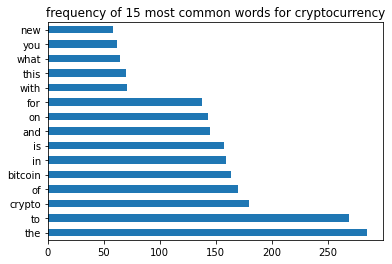

In [54]:
crypto_df.sum().sort_values(ascending = False).head(15).plot(kind='barh')
plt.title('frequency of 15 most common words for cryptocurrency')
plt.savefig('EDA/frq_crypto.png');

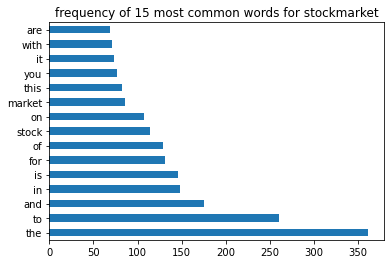

In [55]:
stock_df.sum().sort_values(ascending = False).head(15).plot(kind='barh')
plt.title('frequency of 15 most common words for stockmarket')
plt.savefig('EDA/frq_stock.png');